# Import Libraries

In [107]:
import pandas as pd
import numpy as np
from numpy import argmax, array_equal

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
color_pal = sns.color_palette()

import shap
import xgboost
import optuna
from imgaug import augmenters
from random import randint
import plotly.graph_objects as go
import plotly.figure_factory as ff
from itertools import product
import statsmodels.api as sm
from tqdm import tqdm
import plotly.graph_objects as go
import plotly.figure_factory as ff
from imblearn.over_sampling import SMOTENC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier as cb

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor , AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier as cb
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTENC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeClassifier, RidgeClassifierCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import TensorBoard
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Conv2D, MaxPool2D,MaxPooling2D, UpSampling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model, Model
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam, SGD
from tensorflow.keras.optimizers import Adam, SGD
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')

epochs = 20
num_classes = 10
seed = 42

# Read Data

In [99]:
train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv',sep=',')
test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv', sep = ',')

In [24]:
train = np.array(train, dtype = 'float32')
test = np.array(test, dtype='float32')

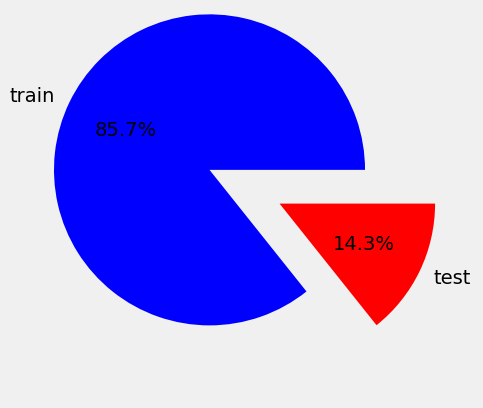

In [94]:
plt.pie([len(train), len(test)], 
labels=['train', 'test'], autopct='%.1f%%', colors=['blue','red'], explode=(0.5, 0))
plt.show()

# DL

# Create Autoencoder Architecture

In [25]:
xtrain = train[:,1:]/255

ytrain = train[:,0]

xtest= test[:,1:]/255

ytest=test[:,0]


xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2)

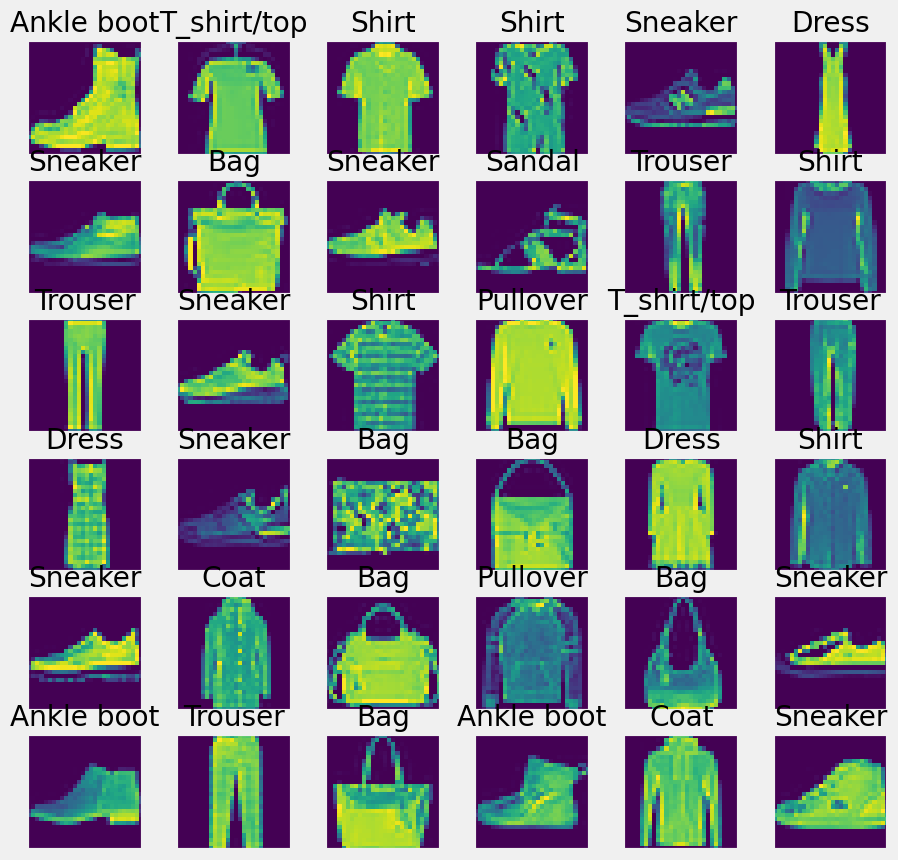

In [83]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i].reshape((28,28)))
    label_index = int(ytrain[i])
    plt.title(class_names[label_index])
plt.show()

In [26]:
input_layer = Input(shape=(784,))


encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)


latent_view   = Dense(10, activation='sigmoid')(encode_layer3)


decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)


output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)


model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 1500)              1177500   
                                                                 
 dense_9 (Dense)             (None, 1000)              1501000   
                                                                 
 dense_10 (Dense)            (None, 500)               500500    
                                                                 
 dense_11 (Dense)            (None, 10)                5010      
                                                                 
 dense_12 (Dense)            (None, 500)               5500      
                                                                 
 dense_13 (Dense)            (None, 1000)              5010

In [28]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


model.fit(xtrain, xtrain, epochs=20, batch_size=2048, validation_data=(xval, xval), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 19s 719ms/step - loss: 0.0977 - val_loss: 0.0714
Epoch 2/20
24/24 [==============================] - 17s 717ms/step - loss: 0.0640 - val_loss: 0.0544
Epoch 3/20
24/24 [==============================] - 17s 697ms/step - loss: 0.0479 - val_loss: 0.0424
Epoch 4/20
24/24 [==============================] - 17s 703ms/step - loss: 0.0399 - val_loss: 0.0379
Epoch 5/20
24/24 [==============================] - 17s 709ms/step - loss: 0.0369 - val_loss: 0.0362
Epoch 6/20
24/24 [==============================] - 17s 690ms/step - loss: 0.0342 - val_loss: 0.0322
Epoch 7/20
24/24 [==============================] - 17s 710ms/step - loss: 0.0312 - val_loss: 0.0295
Epoch 8/20
24/24 [==============================] - 17s 694ms/step - loss: 0.0286 - val_loss: 0.0278
Epoch 9/20
24/24 [==============================] - 17s 714ms/step - loss: 0.0272 - val_loss: 0.0261
Epoch 10/20
24/24 [==============================] - 17s 693ms/step - loss: 0.0251 - val_lo

In [29]:
preds = model.predict(xval)

375/375 [==============================] - 4s 11ms/step


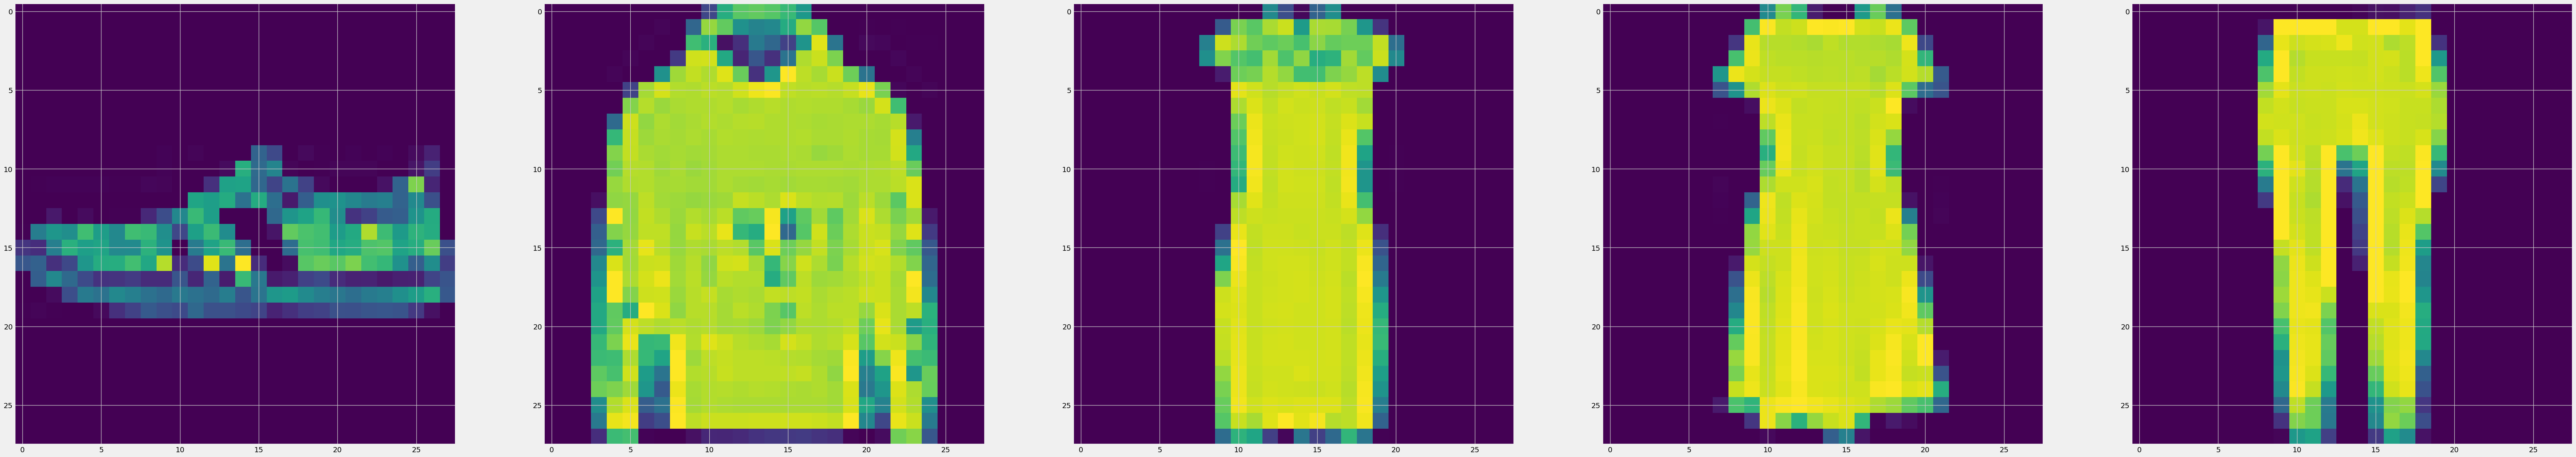

In [31]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(xval[i].reshape(28, 28))
plt.show()

In [34]:
def dataset_preparation(n_in, n_out, n_unique, n_samples):
    X1, X2, y = [], [], []
    for _ in range(n_samples):
        ## create random numbers sequence - input 
        inp_seq = [randint(1, n_unique-1) for _ in range(n_in)]
        
        ## create target sequence
        target = inp_seq[:n_out]
    
        ## create padded sequence / seed sequence 
        target_seq = list(reversed(target))
        seed_seq = [0] + target_seq[:-1]  
        
        # convert the elements to categorical using keras api
        X1.append(to_categorical([inp_seq], num_classes=n_unique))
        X2.append(to_categorical([seed_seq], num_classes=n_unique))
        y.append(to_categorical([target_seq], num_classes=n_unique))
    
    # remove unnecessary dimention
    X1 = np.squeeze(np.array(X1), axis=1) 
    X2 = np.squeeze(np.array(X2), axis=1) 
    y  = np.squeeze(np.array(y), axis=1) 
    return X1, X2, y

samples = 100000
features = 51
inp_size = 6
out_size = 3

inputs, seeds, outputs = dataset_preparation(inp_size, out_size, features, samples)
print("Shapes: ", inputs.shape, seeds.shape, outputs.shape)
print ("Here is first categorically encoded input sequence looks like: ", )
inputs[0][0]

Shapes:  (100000, 6, 51) (100000, 3, 51) (100000, 3, 51)
Here is first categorically encoded input sequence looks like: 


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32)

In [35]:
def define_models(n_input, n_output):
    
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(128, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]

    
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    
    
    encoder_model = Model(encoder_inputs, encoder_states)
    decoder_state_input_h = Input(shape=(128,))
    decoder_state_input_c = Input(shape=(128,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

    return model, encoder_model, decoder_model

autoencoder, encoder_model, decoder_model = define_models(features, features)

In [36]:
autoencoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, 51)]   0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, None, 51)]   0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 128),        92160       ['input_3[0][0]']                
                                 (None, 128),                                                     
                                 (None, 128)]                                                     
                                                                                            

In [38]:
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
autoencoder.fit([inputs, seeds], outputs, epochs=2)

Epoch 1/2
3125/3125 [==============================] - 46s 14ms/step - loss: 0.0118 - acc: 0.9987
Epoch 2/2
3125/3125 [==============================] - 42s 13ms/step - loss: 0.0036 - acc: 0.9995


In [39]:
def reverse_onehot(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

def predict_sequence(encoder, decoder, sequence):
    output = []
    target_seq = np.array([0.0 for _ in range(features)])
    target_seq = target_seq.reshape(1, 1, features)

    current_state = encoder.predict(sequence)
    for t in range(out_size):
        pred, h, c = decoder.predict([target_seq] + current_state)
        output.append(pred[0, 0, :])
        current_state = [h, c]
        target_seq = pred
    return np.array(output)

In [42]:
for k in range(5):
    X1, X2, y = dataset_preparation(inp_size, out_size, features, 1)
    target = predict_sequence(encoder_model, decoder_model, X1)
    print('\nInput Sequence=%s SeedSequence=%s, PredictedSequence=%s' 
          % (reverse_onehot(X1[0]), reverse_onehot(y[0]), reverse_onehot(target)))

1/1 [==============================] - 0s 24ms/step

Input Sequence=[24, 6, 47, 25, 33, 5] SeedSequence=[47, 6, 24], PredictedSequence=[47, 6, 24]
1/1 [==============================] - 0s 27ms/step

Input Sequence=[25, 26, 45, 18, 16, 48] SeedSequence=[45, 26, 25], PredictedSequence=[45, 26, 25]
1/1 [==============================] - 0s 26ms/step

Input Sequence=[13, 1, 36, 41, 14, 28] SeedSequence=[36, 1, 13], PredictedSequence=[36, 1, 13]
1/1 [==============================] - 0s 25ms/step

Input Sequence=[42, 21, 10, 24, 48, 29] SeedSequence=[10, 21, 42], PredictedSequence=[10, 21, 42]
1/1 [==============================] - 0s 25ms/step

Input Sequence=[3, 21, 7, 4, 12, 11] SeedSequence=[7, 21, 3], PredictedSequence=[7, 21, 3]


# CNN

In [54]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [55]:
xtrain = xtrain.reshape(xtrain.shape[0],*image_shape)
xtest = xtest.reshape(xtest.shape[0],*image_shape)
xval = xval.reshape(xval.shape[0],*image_shape)

In [79]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(), 
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
])

In [58]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
                  
history = cnn_model.fit(
    xtrain,
    ytrain,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(xval,yval),
)

Epoch 1/75
12/12 [==============================] - 17s 1s/step - loss: 1.6816 - accuracy: 0.4812 - val_loss: 1.0645 - val_accuracy: 0.6858
Epoch 2/75
12/12 [==============================] - 17s 1s/step - loss: 0.8500 - accuracy: 0.7268 - val_loss: 0.6793 - val_accuracy: 0.7649
Epoch 3/75
12/12 [==============================] - 16s 1s/step - loss: 0.6323 - accuracy: 0.7774 - val_loss: 0.5734 - val_accuracy: 0.7974
Epoch 4/75
12/12 [==============================] - 17s 1s/step - loss: 0.5502 - accuracy: 0.8055 - val_loss: 0.5215 - val_accuracy: 0.8183
Epoch 5/75
12/12 [==============================] - 16s 1s/step - loss: 0.5073 - accuracy: 0.8223 - val_loss: 0.4936 - val_accuracy: 0.8267
Epoch 6/75
12/12 [==============================] - 17s 1s/step - loss: 0.4762 - accuracy: 0.8336 - val_loss: 0.4677 - val_accuracy: 0.8384
Epoch 7/75
12/12 [==============================] - 16s 1s/step - loss: 0.4524 - accuracy: 0.8422 - val_loss: 0.4488 - val_accuracy: 0.8457
Epoch 8/75
12/12 [==

Text(0.5, 1.0, 'Train - Accuracy')

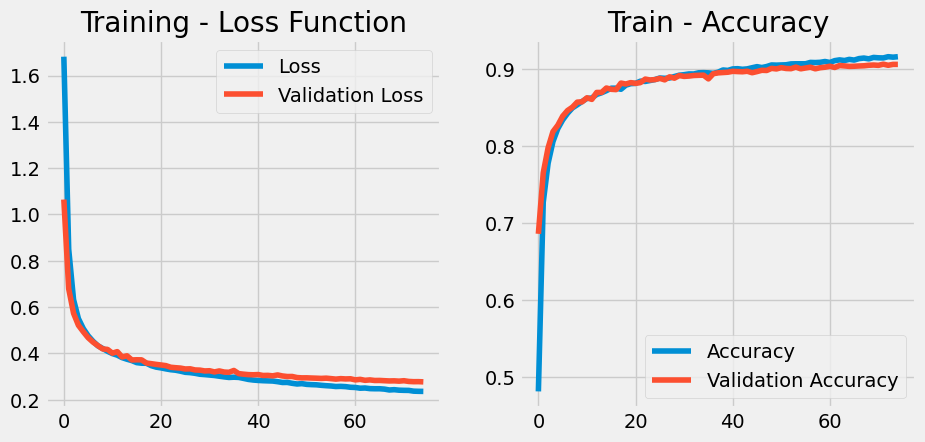

In [61]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [77]:
score = cnn_model.evaluate(xtest,ytest,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2607
Test Accuracy : 0.9094


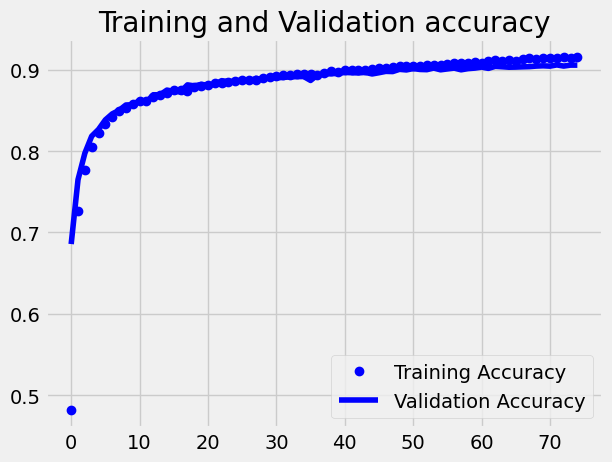

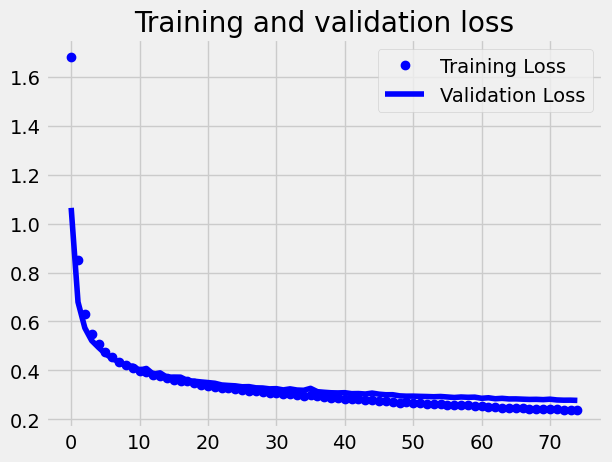

In [71]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [89]:
model.save('Autoencoder Architecture')
print ("Model saved successfully!")

Model saved successfully!


In [90]:
cnn_model.save('CNN_model')
print ("Model saved successfully!")

Model saved successfully!
